In [ ]:
import pandas as pd
df = pd.read_csv("amazon-food_reviews.csv")
df.head()


,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# Subsample each class to 3,500 samples
balanced_df = pd.DataFrame()  # Empty DataFrame to hold the balanced data

for score in df['Score'].unique():
    # Check if there are enough samples in the class
    num_samples = min(3200, df[df['Score'] == score].shape[0])
    subsample = df[df['Score'] == score].sample(n=num_samples, random_state=42, replace=(num_samples < 3500))
    balanced_df = pd.concat([balanced_df, subsample], axis=0)

# Shuffle the DataFrame to mix up the rows
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display new distribution
print("Balanced distribution:\n", balanced_df['Score'].value_counts())

Balanced distribution:
 Score
4    3200
1    3200
5    3200
2    3200
3    3200
Name: count, dtype: int64


In [ ]:
balanced_df.head()
balanced_df.shape


(16000, 3)

In [ ]:
df = balanced_df

In [ ]:

# Apply one-hot encoding
one_hot_encoded_scores = pd.get_dummies(df['Score'], prefix='rating')

# Concatenate the one-hot encoded columns back to the original dataframe
df = pd.concat([df, one_hot_encoded_scores], axis=1)

# Optionally, you can drop the original 'Score' column if you no longer need it
# df.drop('Score', axis=1, inplace=True)

# Display the modified DataFrame to confirm changes
df.head()
df["Score"].value_counts()

Score
4    3200
1    3200
5    3200
2    3200
3    3200
Name: count, dtype: int64

In [ ]:

df

,Score,Summary,Text,rating_1,rating_2,rating_3,rating_4,rating_5
0,4,Earthy,Outstanding value. This oil is very herby. I...,False,False,False,True,False
1,1,Not Recommended At All,I didn't think you could really go wrong with ...,True,False,False,False,False
2,1,Havahart Critter Ridder,This product did NOT reach anywhere close to m...,True,False,False,False,False
3,5,KEEPS MY GIRL BUSY!!,I buy these for my 75lb boxer/pit bull mix. Sh...,False,False,False,False,True
4,4,"More like ""human"" food than Cat Food","My cats are crazy for this food, including the...",False,False,False,True,False
...,...,...,...,...,...,...,...,...
15995,3,"5 Star product, 1 star price","I try to drink soda only rarely, but I used to...",False,False,True,False,False
15996,1,"Very Good Product, Very Bad Seller!","A really good product according to my MIL, she...",True,False,False,False,False
15997,5,"Our new ""go to"" coffee",This has become our daily coffee. We were prev...,False,False,False,False,True
15998,3,Delivery nightmare,"Packaging was great, thank God, but the driver...",False,False,True,False,False


In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\d+\b', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply preprocessing
preprocessed_texts = [preprocess_text(text) for text in df['Text']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(preprocessed_texts)


In [ ]:
from sklearn.model_selection import train_test_split

# Select the target columns (one-hot encoded ratings)
target_columns = [col for col in df.columns if col.startswith('rating_')]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_vectors, df[target_columns], test_size=0.4, random_state=42
)



In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB

model = OneVsRestClassifier(MultinomialNB())
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report


# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1263
           1       0.00      0.00      0.00      1290
           2       0.00      0.00      0.00      1269
           3       0.50      0.00      0.00      1292
           4       0.50      0.00      0.00      1286

   micro avg       0.20      0.00      0.00      6400
   macro avg       0.20      0.00      0.00      6400
weighted avg       0.20      0.00      0.00      6400
 samples avg       0.00      0.00      0.00      6400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
df = pd.read_csv("amazon-food_reviews.csv")
df.head()
df['Score'] = df['Score'].apply(lambda x: 1 if x>3 else 0)
df = df.iloc[:80000].copy()
df.head()
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\d+\b', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply preprocessing
preprocessed_texts = [preprocess_text(text) for text in df['Text']]
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(preprocessed_texts)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    tfidf_vectors, df['Score'], test_size=0.2, random_state=42
)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.7820625
              precision    recall  f1-score   support

           0       0.90      0.03      0.07      3597
           1       0.78      1.00      0.88     12403

    accuracy                           0.78     16000
   macro avg       0.84      0.52      0.47     16000
weighted avg       0.81      0.78      0.69     16000



In [ ]:
df["Score"].value_counts()

Score
1    61609
0    18391
Name: count, dtype: int64

In [ ]:
#final code for Tf idf and naive bayes
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv("amazon-food_reviews.csv")

# Apply binary classification to 'Score'
df['Score'] = df['Score'].apply(lambda x: 1 if x >= 3 else 0)
balanced_df = pd.DataFrame()
# Balance the dataset
positive_df = df[df['Score'] == 1].sample(n=18391, random_state=42)  # Downsample positive class
negative_df = df[df['Score'] == 0].sample(n=18391, random_state=42)  # Assume we can take exactly 18391
balanced_df = pd.concat([positive_df, negative_df])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preprocess the text
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\d+\b', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

balanced_df['processed_text'] = balanced_df['Text'].apply(preprocess_text)

# Vectorize the preprocessed text
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(balanced_df['processed_text'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_vectors, balanced_df['Score'], test_size=0.2, random_state=42
)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8465407095283404
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3768
           1       0.84      0.85      0.84      3589

    accuracy                           0.85      7357
   macro avg       0.85      0.85      0.85      7357
weighted avg       0.85      0.85      0.85      7357



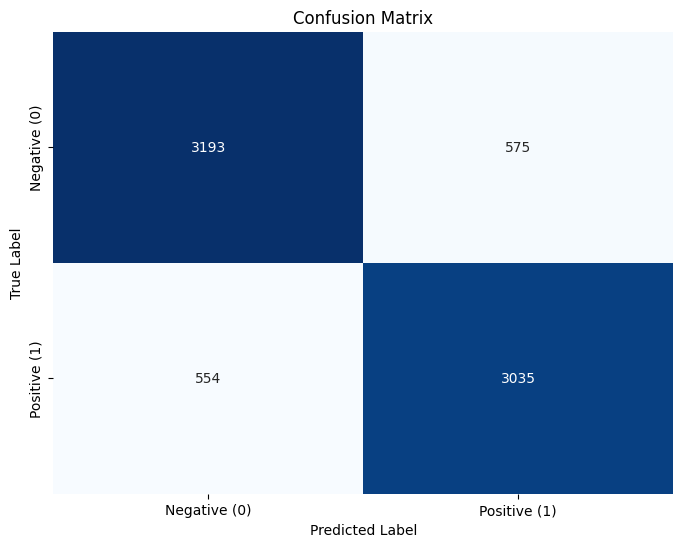

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'predictions' and 'y_test' are available from your model's predictions

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.705450591273617
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      3768
           1       0.69      0.71      0.70      3589

    accuracy                           0.71      7357
   macro avg       0.71      0.71      0.71      7357
weighted avg       0.71      0.71      0.71      7357



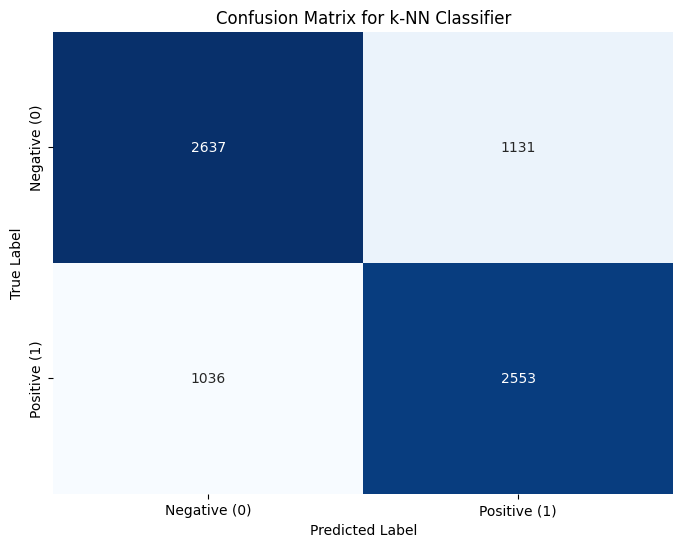

In [ ]:
# knn , tf-idf final code
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("amazon-food_reviews.csv")

# Apply binary classification to 'Score'
df['Score'] = df['Score'].apply(lambda x: 1 if x >= 3 else 0)
balanced_df = pd.DataFrame()
# Balance the dataset
positive_df = df[df['Score'] == 1].sample(n=18391, random_state=42)  # Downsample positive class
negative_df = df[df['Score'] == 0].sample(n=18391, random_state=42)  # Assuming we can take exactly 18391
balanced_df = pd.concat([positive_df, negative_df])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preprocess the text
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\d+\b', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

balanced_df['processed_text'] = balanced_df['Text'].apply(preprocess_text)

# Vectorize the preprocessed text
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(balanced_df['processed_text'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_vectors, balanced_df['Score'], test_size=0.2, random_state=42
)

# Train the k-NN model
k = 5  # The number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on the test set
predictions = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for k-NN Classifier')
plt.show()


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load data
df = pd.read_csv("amazon-food_reviews.csv")

# Apply binary classification to 'Score'
df['Score'] = df['Score'].apply(lambda x: 1 if x >= 3 else 0)

# Balance the dataset
# Assume 'balanced_df' is already created and contains balanced data
balanced_df = pd.DataFrame()
# Balance the dataset
positive_df = df[df['Score'] == 1].sample(n=18391, random_state=42)  # Downsample positive class
negative_df = df[df['Score'] == 0].sample(n=18391, random_state=42)  # Assuming we can take exactly 18391
balanced_df = pd.concat([positive_df, negative_df])

# Preprocess the text
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\d+\b', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

balanced_df['processed_text'] = balanced_df['Text'].apply(preprocess_text)

# Train Word Embeddings Model (Example: Word2Vec)
# Here, 'corpus' is a list of tokenized sentences
corpus = balanced_df['processed_text'].apply(nltk.word_tokenize).tolist()
word2vec_model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

# Convert Text to Word Embeddings
def text_to_word_embeddings(text):
    words = nltk.word_tokenize(text)
    word_embeddings = []
    for word in words:
        if word in word2vec_model.wv:
            word_embeddings.append(word2vec_model.wv[word])
    if len(word_embeddings) == 0:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no word found
    return np.mean(word_embeddings, axis=0)

balanced_df['word_embeddings'] = balanced_df['processed_text'].apply(text_to_word_embeddings)
from sklearn.preprocessing import MinMaxScaler


# Split the data
X = np.vstack(balanced_df['word_embeddings'].to_numpy())
y = balanced_df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.7057224412124508
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      3720
           1       0.69      0.72      0.71      3637

    accuracy                           0.71      7357
   macro avg       0.71      0.71      0.71      7357
weighted avg       0.71      0.71      0.71      7357



In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load data
df = pd.read_csv("amazon-food_reviews.csv")

# Apply binary classification to 'Score'
df['Score'] = df['Score'].apply(lambda x: 1 if x >= 3 else 0)

# Balance the dataset
# Assume 'balanced_df' is already created and contains balanced data
balanced_df = pd.DataFrame()
# Balance the dataset
positive_df = df[df['Score'] == 1].sample(n=18391, random_state=42)  # Downsample positive class
negative_df = df[df['Score'] == 0].sample(n=18391, random_state=42)  # Assuming we can take exactly 18391
balanced_df = pd.concat([positive_df, negative_df])

# Preprocess the text with lemmatization
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatize
    return ' '.join(text)

balanced_df['processed_text'] = balanced_df['Text'].apply(preprocess_text)

# Train Word Embeddings Model (Example: Word2Vec)
# Here, 'corpus' is a list of tokenized sentences
corpus = balanced_df['processed_text'].apply(word_tokenize).tolist()
word2vec_model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

# Convert Text to Word Embeddings
def text_to_word_embeddings(text):
    words = word_tokenize(text)
    word_embeddings = []
    for word in words:
        if word in word2vec_model.wv:
            word_embeddings.append(word2vec_model.wv[word])
    if len(word_embeddings) == 0:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no word found
    return np.mean(word_embeddings, axis=0)

balanced_df['word_embeddings'] = balanced_df['processed_text'].apply(text_to_word_embeddings)

# Split the data
X = np.vstack(balanced_df['word_embeddings'].to_numpy())
y = balanced_df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.7201304879706402
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      3720
           1       0.72      0.72      0.72      3637

    accuracy                           0.72      7357
   macro avg       0.72      0.72      0.72      7357
weighted avg       0.72      0.72      0.72      7357



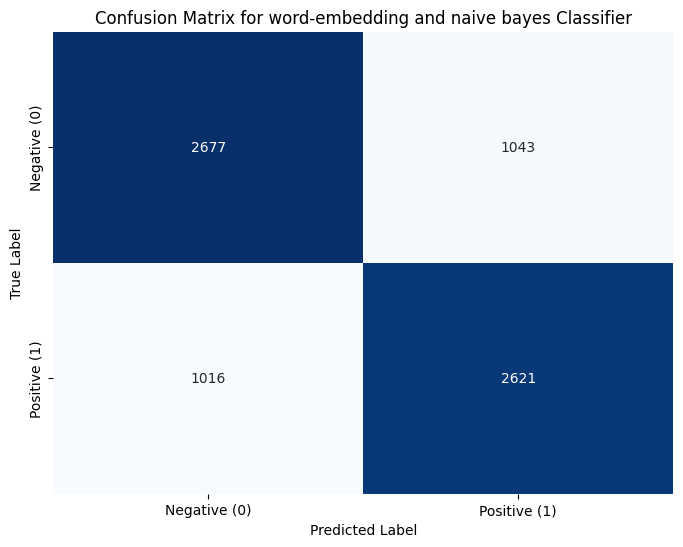

In [ ]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for word-embedding and naive bayes Classifier')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("amazon-food_reviews.csv")

# Apply binary classification to 'Score'
df['Score'] = df['Score'].apply(lambda x: 1 if x >= 3 else 0)

# Balance the dataset
# Assume 'balanced_df' is already created and contains balanced data
balanced_df = pd.DataFrame()
# Balance the dataset
positive_df = df[df['Score'] == 1].sample(n=18391, random_state=42)  # Downsample positive class
negative_df = df[df['Score'] == 0].sample(n=18391, random_state=42)  # Assuming we can take exactly 18391
balanced_df = pd.concat([positive_df, negative_df])

# Preprocess the text
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatize
    return text

balanced_df['processed_text'] = balanced_df['Text'].apply(preprocess_text)

# Train Word Embeddings Model (Example: Word2Vec)
# Here, 'corpus' is a list of tokenized sentences
corpus = balanced_df['processed_text'].tolist()
word2vec_model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

# Convert Text to Word Embeddings
def text_to_word_embeddings(text):
    words = text
    word_embeddings = []
    for word in words:
        if word in word2vec_model.wv:
            word_embeddings.append(word2vec_model.wv[word])
    if len(word_embeddings) == 0:
        return np.zeros(word2vec_model.vector_size)  # Return zero vector if no word found
    return np.mean(word_embeddings, axis=0)

balanced_df['word_embeddings'] = balanced_df['processed_text'].apply(text_to_word_embeddings)

# Split the data
X = np.vstack(balanced_df['word_embeddings'].to_numpy())
y = balanced_df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.7206741878483077
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      3720
           1       0.72      0.70      0.71      3637

    accuracy                           0.72      7357
   macro avg       0.72      0.72      0.72      7357
weighted avg       0.72      0.72      0.72      7357



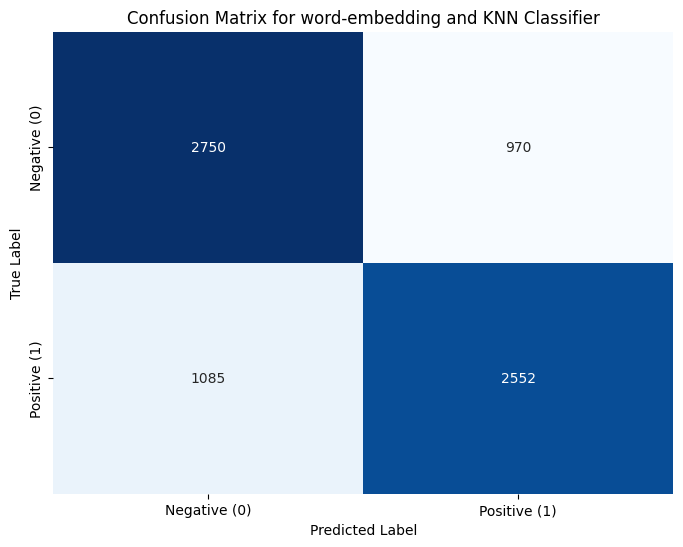

In [ ]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for word-embedding and KNN Classifier')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Load data
df = pd.read_csv("amazon-food_reviews.csv")

# Apply binary classification to 'Score'
df['Score'] = df['Score'].apply(lambda x: 1 if x >= 3 else 0)

# Balance the dataset
# Assume 'balanced_df' is already created and contains balanced data
balanced_df = pd.DataFrame()
# Balance the dataset
positive_df = df[df['Score'] == 1].sample(n=18391, random_state=42)  # Downsample positive class
negative_df = df[df['Score'] == 0].sample(n=18391, random_state=42)  # Assuming we can take exactly 18391
balanced_df = pd.concat([positive_df, negative_df])

# Split the data
X_train, X_val, y_train, y_val = train_test_split(balanced_df['Text'], balanced_df['Score'], test_size=0.2, random_state=42)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Tokenize and encode sequences
max_len = 128
train_encodings = tokenizer(list(X_train), truncation=True, padding='max_length', max_length=max_len)
val_encodings = tokenizer(list(X_val), truncation=True, padding='max_length', max_length=max_len)

# Convert labels to tensors
train_labels = torch.tensor(list(y_train))
val_labels = torch.tensor(list(y_val))

# Convert encodings to PyTorch tensors
train_inputs = torch.tensor(train_encodings['input_ids'])
train_masks = torch.tensor(train_encodings['attention_mask'])
train_labels = torch.tensor(train_labels.values)

val_inputs = torch.tensor(val_encodings['input_ids'])
val_masks = torch.tensor(val_encodings['attention_mask'])
val_labels = torch.tensor(val_labels.values)

# Create DataLoader for training and validation data
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_loader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_loader = DataLoader(val_data, sampler=val_sampler, batch_size=32)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Set optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Fine-tune BERT model
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs, masks, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{epochs}, Average Training Loss: {avg_train_loss:.4f}')

# Evaluate the model
model.eval()
val_preds, val_labels = [], []
for batch in val_loader:
    batch = tuple(t.to(device) for t in batch)
    inputs, masks, labels = batch
    with torch.no_grad():
        outputs = model(inputs, attention_mask=masks)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).cpu().detach().numpy()
    val_preds.extend(preds)
    val_labels.extend(labels.cpu().detach().numpy())

# Calculate accuracy and other metrics
val_accuracy = accuracy_score(val_labels, val_preds)
val_classification_report = classification_report(val_labels, val_preds)

print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:")
print(val_classification_report)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

RuntimeError: Could not infer dtype of builtin_function_or_method

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Load data
df = pd.read_csv("amazon-food_reviews.csv")

# Apply binary classification to 'Score'
df['Score'] = df['Score'].apply(lambda x: 1 if x >= 3 else 0)

# Balance the dataset
# Assume 'balanced_df' is already created and contains balanced data
balanced_df = pd.DataFrame()
# Balance the dataset
positive_df = df[df['Score'] == 1].sample(n=18391, random_state=42)  # Downsample positive class
negative_df = df[df['Score'] == 0].sample(n=18391, random_state=42)  # Assuming we can take exactly 18391
balanced_df = pd.concat([positive_df, negative_df])

# Split the data
X_train, X_val, y_train, y_val = train_test_split(balanced_df['Text'], balanced_df['Score'], test_size=0.2, random_state=42)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Tokenize and encode sequences
max_len = 128
train_encodings = tokenizer(list(X_train), truncation=True, padding='max_length', max_length=max_len)
val_encodings = tokenizer(list(X_val), truncation=True, padding='max_length', max_length=max_len)

# Convert encodings to PyTorch tensors
train_inputs = torch.tensor(train_encodings['input_ids'])
train_masks = torch.tensor(train_encodings['attention_mask'])
train_labels = torch.tensor(y_train.values)

val_inputs = torch.tensor(val_encodings['input_ids'])
val_masks = torch.tensor(val_encodings['attention_mask'])
val_labels = torch.tensor(y_val.values)

# Create DataLoader for training and validation data
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_loader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_loader = DataLoader(val_data, sampler=val_sampler, batch_size=32)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Set device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Set optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

# Fine-tune BERT model
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs, masks, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{epochs}, Average Training Loss: {avg_train_loss:.4f}')

# Evaluate the model
model.eval()
val_preds, val_labels = [], []
for batch in val_loader:
    batch = tuple(t.to(device) for t in batch)
    inputs, masks, labels = batch
    with torch.no_grad():
        outputs = model(inputs, attention_mask=masks)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).cpu().detach().numpy()
    val_preds.extend(preds)
    val_labels.extend(labels.cpu().detach().numpy())

# Calculate accuracy and other metrics
val_accuracy = accuracy_score(val_labels, val_preds)
val_classification_report = classification_report(val_labels, val_preds)

print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:")
print(val_classification_report)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
